# C Building - Fog Test and Data Visualization

In [1]:
import torch
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Where is the dataset saved
root = ""

# Loading the Dataset

The loading methods will be demonstrated on the data recorded on the parking slot.

Loading of the clear data:

In [2]:
root_cb_clear = f"{root}CBuilding/csv/c_building_pedestrian_clear_anon"
dir_blickfeld_clear = f"{root_cb_clear}/blickfeld/"
dir_velodyne_clear = f"{root_cb_clear}/velodyne/"
dir_radar_clear = f"{root_cb_clear}/radar/"

Loading of the foggy data:

In [3]:
root_cb_fog = f"{root}CBuilding/csv/c_building_pedestrian_fog_anon"
dir_blickfeld_fog = f"{root_cb_fog}/blickfeld/"
dir_velodyne_fog = f"{root_cb_fog}/velodyne/"
dir_radar_fog = f"{root_cb_fog}/radar/"

# Analysis

In this part of the notebook, we will get into the analysis of the data in hand and see how to process it.

In [4]:
import csv
import math
import os

def measure_distances(folder_path):
    for i in range(500):
        #Data is gathered in the {i:06d}.csv format, since the csv files are named as: 000000.csv to 000499.csv .
        file_path = os.path.join(folder_path, f"{i:06d}.csv")

        #If for some reason the file path or the csv file is missing, break out of the function.
        if not os.path.exists(file_path):
            break
        
        distance_data = []
        # Read the CSV file
        with open(file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            # For every row inside the csv file, get the cell value.
            for row in csv_reader:
                cell_value = row[0]
                
                if not cell_value:
                    break

                
                # Split this cell value in a way that the first 3 values(x, y, z) are gathered.
                values = cell_value.split()[:3]

                # Format the values into floating values.
                x, y, z = map(float, values)

                # Measure the 3D vectoral distance between the origin point(0, 0, 0) and the previous coordinate.
                distance = math.sqrt(x**2 + y**2 + z**2)

                #Append every distance into a list in order to process it with the histogram.
                distance_data.append(distance)

    return distance_data

In [5]:
#Measure every distance for all 3 sensors, 2 times(for every different scenerio which is clear or foggy).
velodyne_distance_clear = measure_distances(dir_velodyne_clear)
velodyne_distance_fog = measure_distances(dir_velodyne_fog)

blickfeld_distance_clear = measure_distances(dir_blickfeld_clear)
blickfeld_distance_fog = measure_distances(dir_blickfeld_fog)

radar_distance_clear = measure_distances(dir_radar_clear)
radar_distance_fog = measure_distances(dir_radar_fog)

In [6]:
def plot_histograms(distance_list_clear, distance_list_fog):
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True, tight_layout=True)

    # Create histograms
    axs[0].hist(distance_list_clear, bins=50, color='blue', range=[0, 30])
    axs[0].set_title("Clear Environment")
    
    axs[1].hist(distance_list_fog, bins=50, color='orange', range=[0, 30])
    axs[1].set_title("Foggy Environment")

    # Set axis labels and titles
    for ax in axs:
        ax.set_xlabel('Distances')
        ax.set_ylabel('Times of Repetition')

    title = ""
    if distance_list_clear == velodyne_distance_clear:
        title = "Velodyne Puck"      
    elif distance_list_clear == blickfeld_distance_clear:
        title = "Blickfeld Cube 1"     
    else:
        title = "MMWAVCAS-RF-EVM Radar"
    
    plt.suptitle(title+": Sensor Comparison for Different Environments")
    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

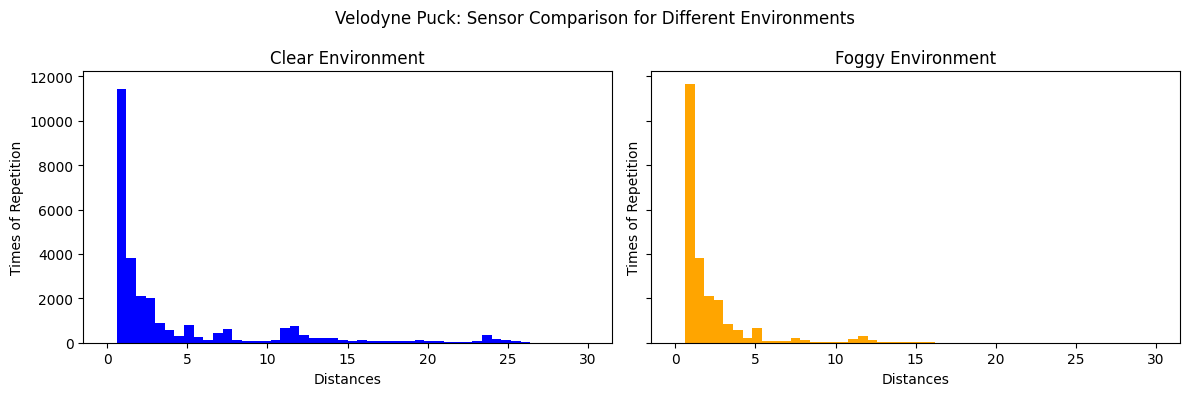

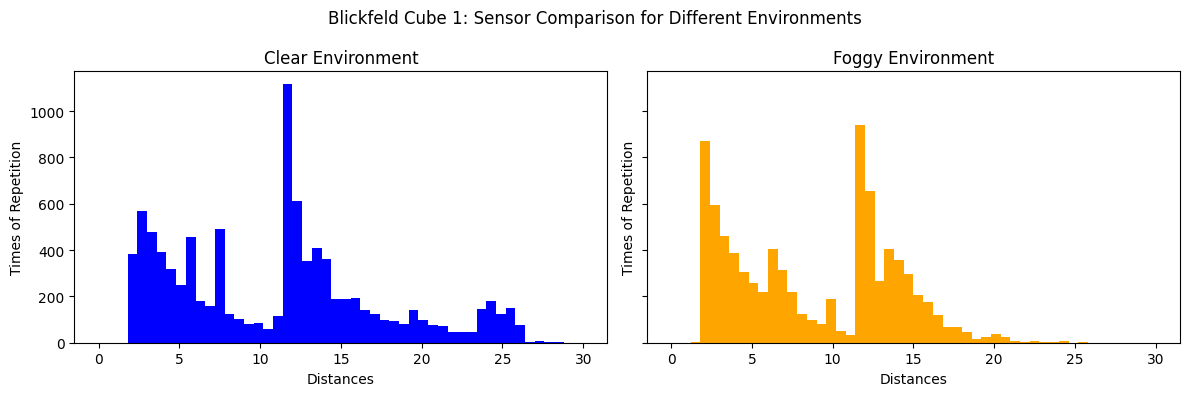

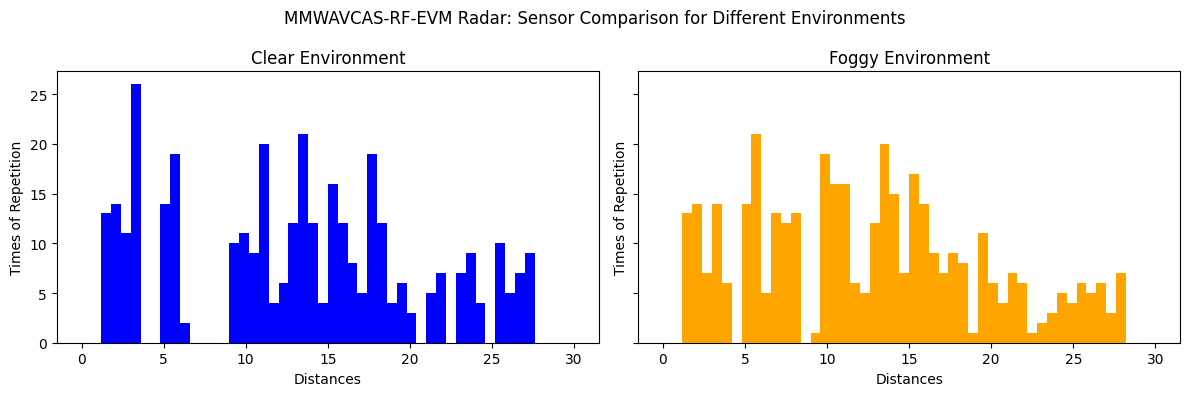

In [7]:
plot_histograms(velodyne_distance_clear, velodyne_distance_fog)
plot_histograms(blickfeld_distance_clear, blickfeld_distance_fog)
plot_histograms(radar_distance_clear, radar_distance_fog)